<span style="font-size: 20pt;"><span style="font-weight: bold;">Chapter 5.</span>Merging and grouping data</span>

Last update: 12 January 2024

Thank you for checking out the code for: 

> Hogan, Bernie (2023) _From Social Science to Data Science_. London, UK: Sage. 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's forthcoming website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.05.MergingAndSQL.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.05.MergingAndSQL.ipynb)

<span style="font-size: 20pt;">📺 YouTube Video lecture for this chapter 📺</span>

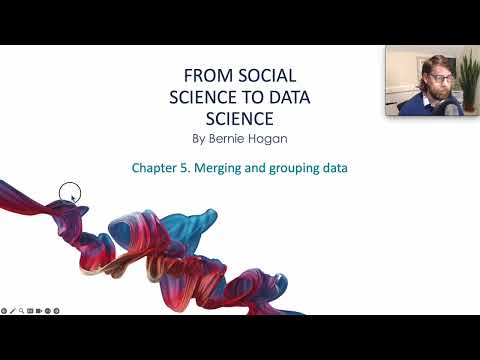

In [57]:
from IPython.display import YouTubeVideo

YouTubeVideo('l1um9W7DwGI')

# Combining data across tables

# A review of adding data to a DataFrame using `concat`

## Adding rows 

In [1]:
import pandas as pd

pd.__version__

'2.0.3'

In [2]:
testList1 = [["a","b","c","d"],["g","h","j","k"]]
testFrame1 = pd.DataFrame(testList1)
display(testFrame1)

testList2 = [["m","n","o","p"],["s","t","u","v"]]
testFrame2 = pd.DataFrame(testList2)
display(testFrame2)

testList3 = [["x","y","z","aa","bb","cc"],["e","f","q","w","ww","www"]]        
testFrame3 = pd.DataFrame(testList3)
display(testFrame3)

,0,1,2,3
0,a,b,c,d
1,g,h,j,k


,0,1,2,3
0,m,n,o,p
1,s,t,u,v


,0,1,2,3,4,5
0,x,y,z,aa,bb,cc
1,e,f,q,w,ww,www


### Attempt 1: Adding the frames together ###

In [3]:
print("mile" + "stone")

milestone


In [4]:
list1and2 = testList1 + testList2
display(list1and2)

[['a', 'b', 'c', 'd'],
 ['g', 'h', 'j', 'k'],
 ['m', 'n', 'o', 'p'],
 ['s', 't', 'u', 'v']]

In [5]:
frame1and2 = testFrame1 + testFrame2
display(frame1and2)

frame1and3 = testFrame1 + testFrame3
display(frame1and3)

,0,1,2,3
0,am,bn,co,dp
1,gs,ht,ju,kv


,0,1,2,3,4,5
0,ax,by,cz,daa,NaN,NaN
1,ge,hf,jq,kw,NaN,NaN


### Attempt 2: Concatenating frames ###

In [6]:
testFrame4 = pd.concat([testFrame1, testFrame2, testFrame3])
testFrame4

,0,1,2,3,4,5
0,a,b,c,d,NaN,NaN
1,g,h,j,k,NaN,NaN
0,m,n,o,p,NaN,NaN
1,s,t,u,v,NaN,NaN
0,x,y,z,aa,bb,cc
1,e,f,q,w,ww,www


## Adding columns 

### Single columns of data

In [7]:
df = pd.DataFrame(testList1)

display("The original data:", df)

'The original data:'

,0,1,2,3
0,a,b,c,d
1,g,h,j,k


In [8]:
dd = {0:"AA",1:"BB",2:"CC"}
ll1 = [33,44,55]
ll2 = [66,77]
ss = pd.Series(ll1) # ,index=[2,1,0])

for col in [dd,ll1,ll2,ss]:
    print(f"Data to try:\n{col}")
    try: 
        df[len(df.columns)] = col
    except ValueError:
        print("Error: Please add cols of the correct length or use a Series.")
    else:
        print("Data successfully added")
    print()

Data to try:
{0: 'AA', 1: 'BB', 2: 'CC'}
Data successfully added

Data to try:
[33, 44, 55]
Error: Please add cols of the correct length or use a Series.

Data to try:
[66, 77]
Data successfully added

Data to try:
0    33
1    44
2    55
dtype: int64
Data successfully added



In [9]:
display(df)

,0,1,2,3,4,5,6
0,a,b,c,d,AA,66,33
1,g,h,j,k,BB,77,44


### Multiple rows or columns of data 

In [10]:
testFrame4 = pd.concat([testFrame1, testFrame2],axis=1)
testFrame4.index = ['top-row', 'bottom-row']
display(testFrame4)

,0,1,2,3,0,1,2,3
top-row,a,b,c,d,m,n,o,p
bottom-row,g,h,j,k,s,t,u,v


In [11]:
testFrame4.loc["top-row",0] = "test"

display(testFrame4)

,0,1,2,3,0,1,2,3
top-row,test,b,c,d,test,n,o,p
bottom-row,g,h,j,k,s,t,u,v


## Multi-level indexed data

In [12]:
testFrame4 = pd.concat([testFrame1, testFrame2],axis=1,
                       keys=["left-side-vars","right-side-vars"])

testFrame4.index = ['top', 'bottom']
display(testFrame4)

left-side-vars          right-side-vars         
                    0  1  2  3               0  1  2  3
top                 a  b  c  d               m  n  o  p
bottom              g  h  j  k               s  t  u  v

In [13]:
print("Query a series from multi-indexed data:")
print(testFrame4["left-side-vars",3])

Query a series from multi-indexed data:
top       d
bottom    k
Name: (left-side-vars, 3), dtype: object


In [14]:
print("Query a single item for multi-indexed data:")
print(testFrame4["left-side-vars",2]["top"])

Query a single item for multi-indexed data:
c


In [15]:
testFrame4["left-side-vars",0]["top"] = "test"

testFrame4

left-side-vars          right-side-vars         
                    0  1  2  3               0  1  2  3
top              test  b  c  d               m  n  o  p
bottom              g  h  j  k               s  t  u  v

## Transposing a DataFrame 

In [16]:
display(testFrame4.T)

top bottom
left-side-vars  0  test      g
                1     b      h
                2     c      j
                3     d      k
right-side-vars 0     m      s
                1     n      t
                2     o      u
                3     p      v

# The "Key" to merging

## One-to-many vs one-to-one relationships

In [17]:
d = {"England":53,"Jersey":.1,"Northern Ireland":2,"Scotland":5,"Wales":3}

country_df = pd.DataFrame(pd.Series(d),
                          columns=["Population"])
display(country_df)

,Population
England,53.0
Jersey,0.1
Northern Ireland,2.0
Scotland,5.0
Wales,3.0


In [18]:
people = [["Ali",32,"Wales"],
          ["Barb",35,"Northern Ireland"],
          ["Cam",21,"England"],
          ["Dot",45,"Northern Ireland"],
          ["Ellen",21,"Scotland"],
          ["Farah",50,"England"],
          ["Grant",28,"Scotland"],
          ["Hannah",36,"England"],
          ["Idris",40,"Isle of Man"]]

people_df = pd.DataFrame(people,
                         columns=["Name","Age","Country"])
display(people_df)

,Name,Age,Country
0,Ali,32,Wales
1,Barb,35,Northern Ireland
2,Cam,21,England
3,Dot,45,Northern Ireland
4,Ellen,21,Scotland
5,Farah,50,England
6,Grant,28,Scotland
7,Hannah,36,England
8,Idris,40,Isle of Man


In [19]:
# Here we use the `country` column for the key for the left DataFrame. 
# We use the index for the key in the right DataFrame.
merge_df = people_df.merge(country_df,
                           left_on="Country",
                           right_index=True)
display(merge_df)

,Name,Age,Country,Population
0,Ali,32,Wales,3.0
1,Barb,35,Northern Ireland,2.0
3,Dot,45,Northern Ireland,2.0
2,Cam,21,England,53.0
5,Farah,50,England,53.0
7,Hannah,36,England,53.0
4,Ellen,21,Scotland,5.0
6,Grant,28,Scotland,5.0


In [20]:
merge_df = country_df.merge(people_df,
                              left_index=True,
                              right_on="Country")
display(merge_df)

,Population,Name,Age,Country
2,53.0,Cam,21,England
5,53.0,Farah,50,England
7,53.0,Hannah,36,England
1,2.0,Barb,35,Northern Ireland
3,2.0,Dot,45,Northern Ireland
4,5.0,Ellen,21,Scotland
6,5.0,Grant,28,Scotland
0,3.0,Ali,32,Wales


# Understanding joins 

## A join as a kind of set logic

In [21]:
s1 = [1,2,2,3,4,5,5,5,5,5,6]
print("As a list:\t",s1)
print("As a set:\t",set(s1))
print("As a series:\t",pd.Series(s1).unique())

As a list:	 [1, 2, 2, 3, 4, 5, 5, 5, 5, 5, 6]
As a set:	 {1, 2, 3, 4, 5, 6}
As a series:	 [1 2 3 4 5 6]


In [22]:
setCount = set([1,2,3,4,5]) # the first five numbers

setOdd = set([1,3,5,7,9]) # the first five odd numbers 

print(f"setCount:\t{setCount}")
print(f"setOdd:  \t{setOdd}")
print()

print("Union (all of the elements from both):\t\t", setOdd.union(setCount))
print("Intersection (all elements in common):\t\t",
      setOdd.intersection(setCount))

print("Set subtraction (setCount minus setOdd):\t", setCount - setOdd)
print("Set subtraction (setOdd minus setCount):\t", setOdd - setCount)

setCount:	{1, 2, 3, 4, 5}
setOdd:  	{1, 3, 5, 7, 9}

Union (all of the elements from both):		 {1, 2, 3, 4, 5, 7, 9}
Intersection (all elements in common):		 {1, 3, 5}
Set subtraction (setCount minus setOdd):	 {2, 4}
Set subtraction (setOdd minus setCount):	 {9, 7}


## Inner join

In [23]:
merge_df = people_df.merge(country_df,
                           left_on="Country", right_index=True,
                           how='inner')
display(merge_df)

,Name,Age,Country,Population
0,Ali,32,Wales,3.0
1,Barb,35,Northern Ireland,2.0
3,Dot,45,Northern Ireland,2.0
2,Cam,21,England,53.0
5,Farah,50,England,53.0
7,Hannah,36,England,53.0
4,Ellen,21,Scotland,5.0
6,Grant,28,Scotland,5.0


## Outer join

In [24]:
merge_df = people_df.merge(country_df,
                           left_on="Country",
                           right_index=True,
                           how='outer')

# merge_df.reset_index(inplace=True, drop=True)
display(merge_df)

,Name,Age,Country,Population
0.0,Ali,32.0,Wales,3.0
1.0,Barb,35.0,Northern Ireland,2.0
3.0,Dot,45.0,Northern Ireland,2.0
2.0,Cam,21.0,England,53.0
5.0,Farah,50.0,England,53.0
7.0,Hannah,36.0,England,53.0
4.0,Ellen,21.0,Scotland,5.0
6.0,Grant,28.0,Scotland,5.0
8.0,Idris,40.0,Isle of Man,NaN
NaN,NaN,NaN,Jersey,0.1


## Left join

In [25]:
merge_df = people_df.merge(country_df,
                           left_on="Country", right_index=True,
                           how='left')
display(merge_df)

,Name,Age,Country,Population
0,Ali,32,Wales,3.0
1,Barb,35,Northern Ireland,2.0
2,Cam,21,England,53.0
3,Dot,45,Northern Ireland,2.0
4,Ellen,21,Scotland,5.0
5,Farah,50,England,53.0
6,Grant,28,Scotland,5.0
7,Hannah,36,England,53.0
8,Idris,40,Isle of Man,NaN


## Right join

In [26]:
merge_df = people_df.merge(country_df,
                           left_on="Country", right_index=True,
                           how='right')

merge_df.reset_index(inplace=True, drop=True)

display(merge_df)

,Name,Age,Country,Population
0,Cam,21.0,England,53.0
1,Farah,50.0,England,53.0
2,Hannah,36.0,England,53.0
3,NaN,NaN,Jersey,0.1
4,Barb,35.0,Northern Ireland,2.0
5,Dot,45.0,Northern Ireland,2.0
6,Ellen,21.0,Scotland,5.0
7,Grant,28.0,Scotland,5.0
8,Ali,32.0,Wales,3.0


# Grouping and aggregating data 

In [27]:
people_df = pd.DataFrame([["Ali",32,"Wales",3200],
          ["Barb",35,"Northern Ireland",202],
          ["Cam",21,"England",657],
          ["Dot",45,"Northern Ireland",24],
          ["Ellen",21,"Scotland",81],
          ["Farah",50,"England",9723],
          ["Grant",28,"Scotland",664],
          ["Hannah",36,"England",200],
          ["Idris",40,"Isle of Man",1]],columns=["Name","Age","Country","Tweets"])

display(people_df)

,Name,Age,Country,Tweets
0,Ali,32,Wales,3200
1,Barb,35,Northern Ireland,202
2,Cam,21,England,657
3,Dot,45,Northern Ireland,24
4,Ellen,21,Scotland,81
5,Farah,50,England,9723
6,Grant,28,Scotland,664
7,Hannah,36,England,200
8,Idris,40,Isle of Man,1


In [28]:
# Old code: (will produce an error)
if pd.__version__ < '2':
    group_df = people_df.groupby('Country').mean()
else:
#     # New code for Pandas 2: Only aggregate the numeric columns
    group_df = people_df[['Country','Age','Tweets']].groupby('Country').mean()#agg('mean')
    
display(group_df.style.format("{:.1f}"))

,Age,Tweets
Country,,
England,35.7,3526.7
Isle of Man,40.0,1.0
Northern Ireland,40.0,113.0
Scotland,24.5,372.5
Wales,32.0,3200.0


To select only numeric types, which is something we must do in a `groupby` statement with `pandas 2.*`, you can use the following code: 

```python 
df.select_dtypes(include=['number'])
```

Below see how we first filter people_df to the numeric types, retain the key (country), and aggregate.  

In [29]:
group_df = people_df.select_dtypes(include=['number'])
group_df['Country'] = people_df['Country']

display(group_df)

,Age,Tweets,Country
0,32,3200,Wales
1,35,202,Northern Ireland
2,21,657,England
3,45,24,Northern Ireland
4,21,81,Scotland
5,50,9723,England
6,28,664,Scotland
7,36,200,England
8,40,1,Isle of Man


Or you can do this in a single step by considering just selecting the column names first and then filtering the DataFrame. See below:

In [30]:
group_df = people_df[people_df.select_dtypes(include=['number'])
                     .columns.union(['Country'])]

display(group_df)

,Age,Country,Tweets
0,32,Wales,3200
1,35,Northern Ireland,202
2,21,England,657
3,45,Northern Ireland,24
4,21,Scotland,81
5,50,England,9723
6,28,Scotland,664
7,36,England,200
8,40,Isle of Man,1


In [31]:
display(group_df
        .groupby('Country')
        .agg(["sum","mean"])
        .style.format("{:.1f}"))

## Grand mean centering 

In [32]:
mean_vals = people_df.select_dtypes(include=['number']).apply(lambda x: x.mean())

mean_vals

Age         34.222222
Tweets    1639.111111
dtype: float64

In [33]:
for i in mean_vals.index:
    people_df[f"{i}_grand"] = people_df[i] - mean_vals[i]
    
display(people_df)

for i in mean_vals.index:
    del people_df[f"{i}_grand"]

,Name,Age,Country,Tweets,Age_grand,Tweets_grand
0,Ali,32,Wales,3200,-2.222222,1560.888889
1,Barb,35,Northern Ireland,202,0.777778,-1437.111111
2,Cam,21,England,657,-13.222222,-982.111111
3,Dot,45,Northern Ireland,24,10.777778,-1615.111111
4,Ellen,21,Scotland,81,-13.222222,-1558.111111
5,Farah,50,England,9723,15.777778,8083.888889
6,Grant,28,Scotland,664,-6.222222,-975.111111
7,Hannah,36,England,200,1.777778,-1439.111111
8,Idris,40,Isle of Man,1,5.777778,-1638.111111


## Group mean centering 

This time we are going to create an interstitial DataFrame, `group_df`, which will hold the group-level values for our data. We will first isolate the data, then we are going to set the index to be the country.

In [34]:
# Isolate numeric columns
group_df = people_df.select_dtypes(include=['number'])
group_df['Country'] = people_df["Country"]

# Get group-specific averages
group_df = group_df.groupby('Country').agg(["mean"])

display(group_df.style.format("{:.1f}"))

,Age,Tweets
,mean,mean
Country,,
England,35.7,3526.7
Isle of Man,40.0,1.0
Northern Ireland,40.0,113.0
Scotland,24.5,372.5
Wales,32.0,3200.0


In [35]:
# Clean up levels (new in Pandas 2)
group_df.columns = group_df.columns.droplevel(1)
display(group_df)

,Age,Tweets
Country,,
England,35.666667,3526.666667
Isle of Man,40.000000,1.000000
Northern Ireland,40.000000,113.000000
Scotland,24.500000,372.500000
Wales,32.000000,3200.000000


In [36]:
# Try to omit "suffixes" parameter and observe
gmc_df = people_df.merge(group_df,
                         left_on="Country", right_index=True,
                         suffixes=["","_gmean"])

display(gmc_df.style.hide(axis='index'))

Name,Age,Country,Tweets,Age_gmean,Tweets_gmean
Ali,32,Wales,3200,32.000000,3200.000000
Barb,35,Northern Ireland,202,40.000000,113.000000
Dot,45,Northern Ireland,24,40.000000,113.000000
Cam,21,England,657,35.666667,3526.666667
Farah,50,England,9723,35.666667,3526.666667
Hannah,36,England,200,35.666667,3526.666667
Ellen,21,Scotland,81,24.500000,372.500000
Grant,28,Scotland,664,24.500000,372.500000
Idris,40,Isle of Man,1,40.000000,1.000000


In [37]:
# I use the _gc suffix for group-centered
for i in group_df.columns:
    gmc_df[i + "_gc"] = gmc_df[i] - gmc_df[i + "_gmean"]

# We only want *_gc and *_mean columns to be formatted.
# The others are count data.
format_dict = {}
for i in group_df.columns: 
    format_dict[i + "_gc"] = '{0:.1f}'
    format_dict[i + "_gmean"] = '{0:.2f}'

display(gmc_df.style.format(format_dict).hide(axis='index'))

Name,Age,Country,Tweets,Age_gmean,Tweets_gmean,Age_gc,Tweets_gc
Ali,32,Wales,3200,32.00,3200.00,0.0,0.0
Barb,35,Northern Ireland,202,40.00,113.00,-5.0,89.0
Dot,45,Northern Ireland,24,40.00,113.00,5.0,-89.0
Cam,21,England,657,35.67,3526.67,-14.7,-2869.7
Farah,50,England,9723,35.67,3526.67,14.3,6196.3
Hannah,36,England,200,35.67,3526.67,0.3,-3326.7
Ellen,21,Scotland,81,24.50,372.50,-3.5,-291.5
Grant,28,Scotland,664,24.50,372.50,3.5,291.5
Idris,40,Isle of Man,1,40.00,1.00,0.0,0.0


# Long versus wide data 

In [38]:
nominate_dict = {
    "Ali":"Dot,Ellen",
    "Barb":"Cam",
    "Cam":"Ali,Barb",
    "Dot":"Ali,Barb,Cam,Ellen",
    "Ellen":"Dot"}

nom_df = pd.DataFrame.from_dict(nominate_dict,
                                orient="index",
                                columns = ["Nominations"])

# Transform the string into a collection
nom_df["Nominations"] = nom_df["Nominations"].map(lambda x: x.split(","))

display(nom_df)

,Nominations
Ali,"[Dot, Ellen]"
Barb,[Cam]
Cam,"[Ali, Barb]"
Dot,"[Ali, Barb, Cam, Ellen]"
Ellen,[Dot]


In [39]:
long_df = pd.DataFrame(nom_df["Nominations"].explode())

display(long_df)

,Nominations
Ali,Dot
Ali,Ellen
Barb,Cam
Cam,Ali
Cam,Barb
Dot,Ali
Dot,Barb
Dot,Cam
Dot,Ellen
Ellen,Dot


## Advanced reshaping 

#  Using SQL databases

## SQL Basics 

In [40]:
import sqlite3 as lite
from pathlib import Path 

data_dir = Path.cwd().parent / 'data'

# This is the 'connection' to the database.
# If no .db file exists at that path one can be created.
con = lite.connect(data_dir / 'example.db')

# The cursor interacts with the contents of the database
cursor = con.cursor() 

cursor.execute('''CREATE TABLE if not exists users(id INTEGER PRIMARY KEY,
                      name TEXT unique,
                      age INTEGER,
                      country TEXT,
                      tweets INTEGER)''')
con.commit()

In [47]:
for i in range(len(people_df)):
    insert = f'''INSERT INTO users(name, age, country,tweets)
               VALUES("{people_df.Name[i]}",
                      {people_df.Age[i]},
                      "{people_df.Country[i]}", 
                      {people_df.Tweets[i]})'''
    try: 
        cursor.execute(insert)
    except lite.IntegrityError as e:
        print("Values were already added.")
con.commit()


Values were already added.
Values were already added.
Values were already added.
Values were already added.
Values were already added.
Values were already added.
Values were already added.
Values were already added.
Values were already added.


## Using SQL for aggregation and filtering

In [48]:
# First, let's just import the entire table as a DataFrame
pd.read_sql('select * from users',con)

,id,name,age,country,tweets
0,1,Ali,32,Wales,3200
1,2,Barb,35,Northern Ireland,202
2,3,Cam,21,England,657
3,4,Dot,45,Northern Ireland,24
4,5,Ellen,21,Scotland,81
5,6,Farah,50,England,9723
6,7,Grant,28,Scotland,664
7,8,Hannah,36,England,200
8,9,Idris,40,Isle of Man,1


In [49]:
# This time lets report a grand aggregation by counting all rows
pd.read_sql('select count(name) from users',con)

,count(name)
0,9


In [50]:
# Below we report a group aggregation by counting rows within country
pd.read_sql('SELECT count(name), country FROM users GROUP BY country',con)

,count(name),country
0,3,England
1,1,Isle of Man
2,2,Northern Ireland
3,2,Scotland
4,1,Wales


In [51]:
# This time we add a new function (avg) to show how we can do more than
# simply count with our aggregations. But the column names are getting ugly.
pd.read_sql("SELECT count(name), avg(tweets), country FROM users GROUP BY country",con)

,count(name),avg(tweets),country
0,3,3526.666667,England
1,1,1.000000,Isle of Man
2,2,113.000000,Northern Ireland
3,2,372.500000,Scotland
4,1,3200.000000,Wales


In [52]:
# A final query that shows the data in a well-formatted dataframe 
pd.read_sql('''SELECT count(name) as Count, 
                avg(tweets) as AvgTweets, 
                country FROM users GROUP BY country 
                ORDER BY AvgTweets desc''',
                con).style.format({'AvgTweets':'{:.1f}'}).hide(axis='index')

Count,AvgTweets,country
3,3526.7,England
1,3200.0,Wales
2,372.5,Scotland
2,113.0,Northern Ireland
1,1.0,Isle of Man


In [54]:
cursor.execute('''CREATE TABLE if not exists country(id INTEGER PRIMARY KEY,
                      name TEXT unique,
                      population FLOAT) ''')

for i in range(len(country_df)):
    insert = f'''INSERT INTO country(name, population)
                 VALUES("{country_df.index[i]}",
                         {country_df.Population[i]})'''
    try: 
        cursor.execute(insert)
    except lite.IntegrityError as e:
        print("Values were already added.")
        
con.commit()

Values were already added.
Values were already added.
Values were already added.
Values were already added.
Values were already added.


In [55]:
display(pd.read_sql('''SELECT users.name, age, country, country.population 
                    FROM users INNER JOIN country 
                    on country.name = users.country''',con))

,name,age,country,population
0,Ali,32,Wales,3.0
1,Barb,35,Northern Ireland,2.0
2,Cam,21,England,53.0
3,Dot,45,Northern Ireland,2.0
4,Ellen,21,Scotland,5.0
5,Farah,50,England,53.0
6,Grant,28,Scotland,5.0
7,Hannah,36,England,53.0


# Summary

# Further reading

# Extensions and reflections 